In [67]:
import pandas as pd 
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt


In [68]:
# Data originally came from https://www.kaggle.com/datasets/tarundalal/the-big-three-anime-arcs
df = pd.read_csv('BigThree.csv')

# Clean up some data quality issues with Naruto show

# Remove some arcs that are not relevant
df = df[df.Arc!='Kakashi Gaiden Arc'] # book only
df = df[df.Arc!='The Seventh Hokage and the Scarlet Spring Arc'] # book only
df = df[df.Arc!='Filler Arcs Arc'] # remove filler
df = df[df.Arc!='Special'] # not sure what this is. Looks suspicious

# for each show get the total number of episodes
episodes_per_arc = df.groupby('BigThree')['TotalEpisodes'].sum()
episodes_per_arc = episodes_per_arc.to_frame()
episodes_per_arc = episodes_per_arc.rename(columns={'TotalEpisodes': 'show_episodes'})

# Merge original df with new df to get the total number of episodes per show
df = pd.merge(df, episodes_per_arc, on='BigThree')

# add new columns for start episode and end_episode
df["end_episode"] = df["Start onEpisode"] + df["TotalEpisodes"] - 1
df = df.rename(columns={'Start onEpisode': 'start_episode'})

# The naruto epsiodes restart the numbering at the beginning of the Shippuden arc.
# Will add 221 to each to keep them continuous.
shippuden_arcs = [
    'Filler Arcs Arc', 
    'Kazekage Rescue Mission Arc', 
    'Tenchi Bridge Reconnaissance Mission Arc', 
    'Twelve Guardian Ninja Arc', 
    'Akatsuki Suppression Mission Arc', 
    'Three-Tails\' Appearance Arc', 
    'Itachi Pursuit Mission Arc', 
    'Tale of Jiraiya the Gallant Arc', 
    'Fated Battle Between Brothers Arc', 
    'Six-Tails Unleashed Arc', 
    'Pain\'s Assault Arc', 
    'Past Arc: The Locus of Konoha Arc', 
    'Five Kage Summit Arc', 
    'Fourth Shinobi World War: Countdown Arc', 
    'Paradise Life on a Boat Arc', 
    'Fourth Shinobi World War: Confrontation Arc', 
    'Power Arc', 
    'Fourth Shinobi World War: Climax Arc', 
    'Kakashi\'s Anbu Arc: The Shinobi That Lives in the Darkness Arc', 
    'Birth of the Ten-Tails\' Jinchūriki Arc', 
    'In Naruto\'s Footsteps: The Friends\' Paths Arc', 
    'Jiraiya Shinobi Handbook: The Tale of Naruto the Hero Arc', 
    'Kaguya Ōtsutsuki Strikes Arc', 
    'Itachi Shinden Book: Light and Darkness Arc', 
    'Childhood Arc', 
    'Sasuke Shinden: Book of Sunrise Arc', 
    'Shikamaru Hiden: A Cloud Drifting in Silent Darkness Arc', 
    'Konoha Hiden: The Perfect Day for a Wedding Arc' 
]

# create a boolean mask for shippuden_arcs
mask = df['Arc'].isin(shippuden_arcs)

# create a temporary DataFrame to hold the modified 'start_episode' values
temp = df[mask]['start_episode'] + 221

# set the 'start_episode' values for the selected rows
df.loc[mask, 'start_episode'] = temp

# reapply this line since i changed them again (note: this is a hack.)
df["end_episode"] = df["start_episode"] + df["TotalEpisodes"] - 1

# Update the total number of episodes for Naruto since renumbered
mask2 = df['BigThree'] == 'Naruto'
df.loc[mask2, 'show_episodes'] = 720

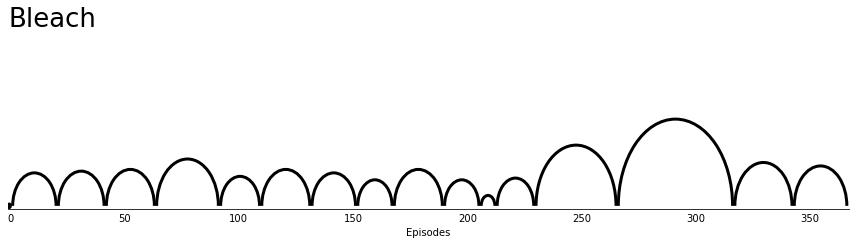

In [66]:
import pandas as pd 
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt

show_name = 'Bleach' # or 'Bleach' or 'Naruto'
show = df[df.BigThree==show_name]  
show_colors = {"Bleach" : "Black", "Naruto" : "Orange", "One Piece" : "Blue"}

plt.rcParams["figure.figsize"] = [12, 3.5]
plt.rcParams["figure.autolayout"] = True

# Each show arc will be represented by arc width (number of episodes)
# Calculate the parameters for each arc.
def calc_arc(x1, x2, y1, y2):
    mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
    r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
    width = 2 * r
    height = 2 * r
    start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
    end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi
    arc_params = [mxmy, width, height, start_angle, end_angle]
    return arc_params

fig, ax = plt.subplots(1,1)

max_height=0
for index, row in show.iterrows():
    # set the parameters for each arc in the show
    x1, y1 = (row.start_episode, 0)
    x2, y2 = (row.end_episode, 0)    
    arc_params = calc_arc(x1, x2, y1, y2)
    
    # keep track of the maximum height of the arcs
    # so that we can use it to set the y-axis
    if arc_params[2] > max_height:
        max_height = arc_params[2]
    
    arc = patches.Arc(arc_params[0], arc_params[1], arc_params[2], arc_params[3], arc_params[4], color=show_colors[show_name], linewidth=3)
    ax.add_patch(arc)
    
# set axes limits
ax.set_xlim(-1, show.show_episodes.max()+1)
ax.set_ylim(-1, max_height)
plt.xlabel('Episodes')
plt.title(show_name, loc='left', fontsize="26", color=show_colors[show_name])
ax.tick_params(axis='both', length=0)
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.show()